In [0]:
 !wget --save-cookies cookies.txt --keep-session-cookies --no-check-certificate "https://docs.google.com/uc?export=download&id=1AAWfvdHrH-GsrO5UFAVvGPBSWNB22R4l" -O- | sed -rn "s/.*confirm=([0-9A-Za-z_]+).*/Code: \1\n/p"

--2019-12-14 14:13:58--  https://docs.google.com/uc?export=download&id=1AAWfvdHrH-GsrO5UFAVvGPBSWNB22R4l
Resolving docs.google.com (docs.google.com)... 74.125.24.138, 74.125.24.100, 74.125.24.139, ...
Connecting to docs.google.com (docs.google.com)|74.125.24.138|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘STDOUT’

-                       [ <=>                ]   3.17K  --.-KB/s    in 0s      

2019-12-14 14:13:58 (16.7 MB/s) - written to stdout [3246]

Code: 4yD2


In [0]:
#in the below URl put the code from the output of the cell above 'Code :####'

!wget --load-cookies cookies.txt "https://docs.google.com/uc?export=download&confirm=4yD2&id=1AAWfvdHrH-GsrO5UFAVvGPBSWNB22R4l" -O /tmp/dataset.zip

import os
import zipfile

local_zip = '/tmp/dataset.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

--2019-12-14 14:16:12--  https://docs.google.com/uc?export=download&confirm=4yD2&id=1AAWfvdHrH-GsrO5UFAVvGPBSWNB22R4l
Resolving docs.google.com (docs.google.com)... 172.217.194.139, 172.217.194.100, 172.217.194.101, ...
Connecting to docs.google.com (docs.google.com)|172.217.194.139|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-0g-94-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/5ioc6pkigisi1cnkmpgaivs7lohguptt/1576332000000/13986308290690852571/*/1AAWfvdHrH-GsrO5UFAVvGPBSWNB22R4l?e=download [following]
--2019-12-14 14:16:13--  https://doc-0g-94-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/5ioc6pkigisi1cnkmpgaivs7lohguptt/1576332000000/13986308290690852571/*/1AAWfvdHrH-GsrO5UFAVvGPBSWNB22R4l?e=download
Resolving doc-0g-94-docs.googleusercontent.com (doc-0g-94-docs.googleusercontent.com)... 172.217.26.65, 2404:6800:4003:80d::2001
Connecting to doc-0g-94-docs.googleuserconten

total sample directory : 2


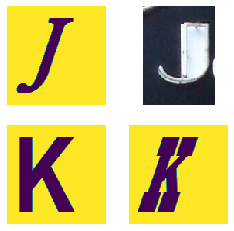

Size of one random image : (128, 128)
 Example image : 
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1.]


In [0]:
from keras.preprocessing.image import ImageDataGenerator
from keras import layers
from keras import models
from keras import optimizers
from random import randint
import sys
import os

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

base_dir = "/tmp/dataset"

train = os.path.join(base_dir,"train")

test  = os.path.join(base_dir,"test")

# utils functions used to plot random image in dataset


def showFolderImageSample(base_folder, img_number=2):
    '''
    base_folder(String) : directory in which we'll look for sample
    img_number : for each folder how many img to show
    '''
    nrows = ncols = img_number

    fig = plt.gcf()
    fig.set_size_inches(ncols * img_number, nrows * img_number)
    dir_names = os.listdir(base_folder)

    # get sample directory
    sample_dir = []
    for i in range(img_number):
        sample_dir.append(dir_names[randint(0,len(dir_names)-1)])
    dir_names = [os.path.join(base_folder, dname) for dname in sample_dir]

    print("total sample directory : {}".format(len(dir_names)))
    # for each sample directory get img_number random image

    img = []
    for d in dir_names:
        for i in range(img_number):
            img.append(os.path.join(d, os.listdir(d)[randint(0, len(os.listdir(d)) - 1)]))

    for i, img_path in enumerate(img):
        # Set up subplot; subplot indices start at 1
        sp = plt.subplot(nrows, ncols, i + 1)
        sp.axis('Off')  # Don't show axes (or gridlines)
        img = mpimg.imread(img_path)
        plt.imshow(img)

    plt.show()
    print("Size of one random image : {}".format(img.shape))
    print(" Example image : \n {}".format(img[0]))

########################################################################


def dirTotalFile(base):
    fileNumber = 0
    if(os.path.isfile(base)):
        return 0
    _dir = os.listdir(base)
    for d in _dir:
        _d = os.path.join(base, d)
        if(os.path.isdir(_d)):
            fileNumber += dirTotalFile(_d)
        else:
            fileNumber += 1
    return fileNumber


###########################################boy li#############################

showFolderImageSample(train,img_number=2)

In [0]:
train_datagen = ImageDataGenerator(rescale=1./255,validation_split=0.2)

val_datagen = ImageDataGenerator(rescale=1./255)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train,
    target_size=(128,128),
    batch_size=30,
    class_mode="categorical",
    subset="training"
)

validation_generator = train_datagen.flow_from_directory(
    train,
    target_size=(128,128),
    batch_size=30,
    class_mode="categorical",
    subset="validation"
)

test_generator = test_datagen.flow_from_directory(
    test,
    target_size=(128,128),
    batch_size=30,
    class_mode="categorical"
)


Found 49448 images belonging to 62 classes.
Found 12325 images belonging to 62 classes.
Found 12334 images belonging to 62 classes.


In [0]:
from keras import optimizers
from keras.applications import VGG16

nodes = 32

### LOADING VGG16 

conv_base = VGG16(weights='imagenet',
            include_top=False,
            input_shape=(128,128,3))

for layer in conv_base.layers:
    layer.trainable=False
    # if layer.name.split('_')[0]=='block5':
    #   layer.trainable=True

conv_base.summary()

# callbacks_list = [keras.callbacks.EarlyStopping(monitor='acc',patience=3,)
#                 ,keras.callbacks.ModelCheckpoint(filepath='checkpointmodel.h5',monitor='val_loss',save_best_only=True,)]


network = models.Sequential()
network.add(conv_base)
network.add(layers.Flatten())
network.add(layers.Dense(62, activation='softmax'))

network.summary()


Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         (None, 128, 128, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 128, 128, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 128, 128, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 64, 64, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 64, 64, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 64, 64, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 32, 32, 128)       0     

Epoch 1/50
100/100 [==============================] - 6s 60ms/step - loss: 2.1398 - acc: 0.4979 - val_loss: 0.9731 - val_acc: 0.7367
Epoch 2/50
100/100 [==============================] - 5s 55ms/step - loss: 1.1944 - acc: 0.6920 - val_loss: 0.6204 - val_acc: 0.8033
Epoch 3/50
100/100 [==============================] - 5s 54ms/step - loss: 1.0106 - acc: 0.7177 - val_loss: 0.8180 - val_acc: 0.7733
Epoch 4/50
100/100 [==============================] - 5s 54ms/step - loss: 0.9555 - acc: 0.7360 - val_loss: 0.6738 - val_acc: 0.7867
Epoch 5/50
100/100 [==============================] - 5s 55ms/step - loss: 0.9240 - acc: 0.7460 - val_loss: 0.6086 - val_acc: 0.8267
Epoch 6/50
100/100 [==============================] - 5s 54ms/step - loss: 0.8793 - acc: 0.7597 - val_loss: 0.8671 - val_acc: 0.7533
Epoch 7/50
100/100 [==============================] - 5s 54ms/step - loss: 0.8390 - acc: 0.7663 - val_loss: 0.4641 - val_acc: 0.8700
Epoch 8/50
100/100 [==============================] - 5s 54ms/step - 

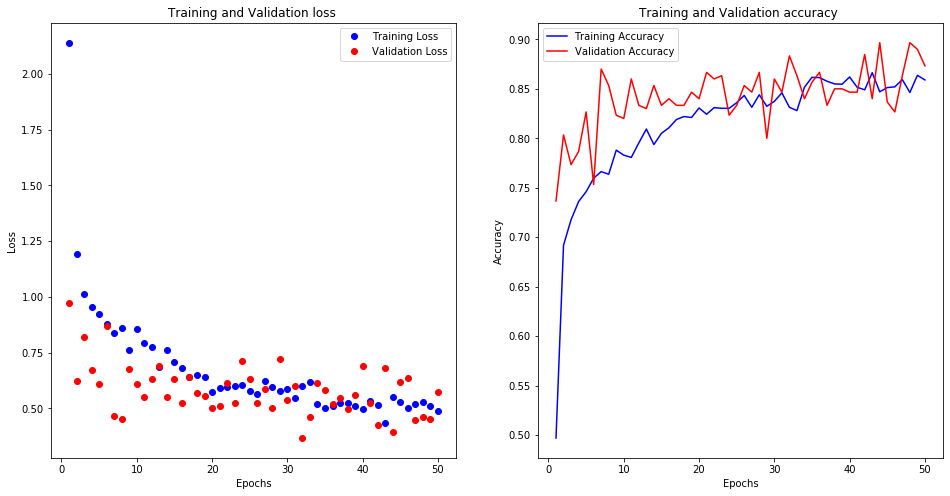

In [0]:

epochs = 50
network.compile(loss='categorical_crossentropy',
                optimizer=optimizers.RMSprop(),
                metrics=['acc'])


history = network.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=epochs,
    verbose=1,
    validation_data=validation_generator,
    validation_steps=10
)


history_dict = history.history 
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']
plt.rcParams['figure.figsize'] = (16,8) # Make the figures a bit bigger
fig,(ax1,ax2,) = plt.subplots(1,2)

x = range(1,epochs+1)
ax1.plot(x,loss_values,'bo',label='Training Loss')
ax1.plot(x,val_loss_values,'ro',label='Validation Loss')
ax1.set_title('Training and Validation loss ')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.legend()


ax2.plot(x,acc_values,'b',label='Training Accuracy')
ax2.plot(x,val_acc_values,'r',label='Validation Accuracy')
ax2.set_title('Training and Validation accuracy ')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.legend()

plt.show()
